####Prova 1

####Aluno: João Victor Barboza Machado das Neves
####j.victor.neves7@gmail.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Questão 1

In [ ]:
def forward_euler(Tf, h, f, t0, u0):
    N = int(Tf / h)
    t = [t0]
    u = [np.array(u0, dtype=float)]

    for n in range(N):
        tn, un = t[-1], u[-1]
        t.append(tn + h)
        u.append(un + h * f(tn, un))

    return np.array(t), np.array(u)

#Solução da função auxiliar para forward_euler

def f(t, u):
    x, y = u
    return np.array([-y, x])


def backward_euler(Tf, h, A, t0, u0):
    N = int(Tf / h)
    t = [t0]
    u = [np.array(u0, dtype=float)]

    I = np.eye(A.shape[0])
    M = np.linalg.inv(I - h*A)

    for n in range(N):
        t.append(t[-1] + h)
        u.append(M @ u[-1])

    return np.array(t), np.array(u)

#Solução da Matriz auxiliar para backward_euler

A = np.array([[0, -1],
              [1,  0]])

tf, uf = forward_euler(10, 0.1, f, 0, [1, 0])
tb, ub = backward_euler(10, 0.1, A, 0, [1, 0])

#Solução Analítica

def u_analytic(t):
    return np.array([np.cos(t), np.sin(t)])

u_an = np.array([u_analytic(ti) for ti in tf])


#Erro
err_fe = np.linalg.norm(uf - u_an, axis=1)
err_be = np.linalg.norm(ub - u_an, axis=1)


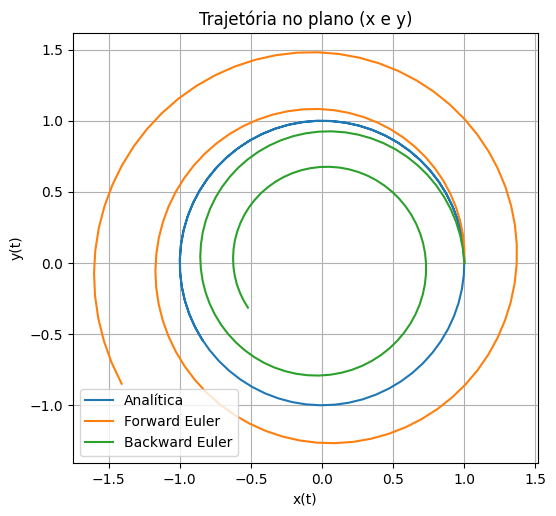

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(u_an[:,0], u_an[:,1], label='Analítica')
plt.plot(uf[:,0], uf[:,1], label='Forward Euler')
plt.plot(ub[:,0], ub[:,1], label='Backward Euler')
plt.gca().set_aspect('equal', 'box')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trajetória no plano (x e y)')
plt.legend()
plt.grid(True)
plt.show()

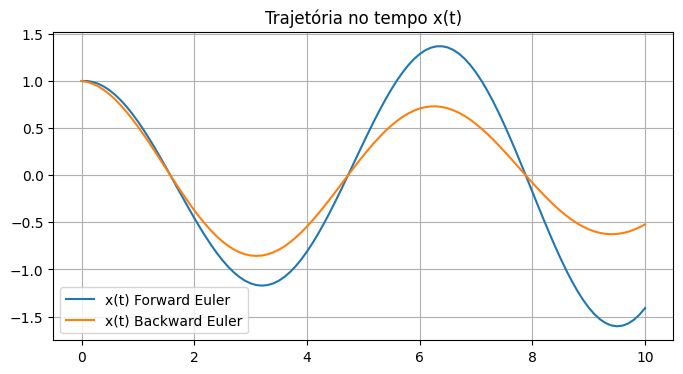

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(tf, uf[:,0], label='x(t) Forward Euler')
plt.plot(tb, ub[:,0], label='x(t) Backward Euler')
plt.title('Trajetória no tempo x(t)')
plt.legend()
plt.grid(True)
plt.show()

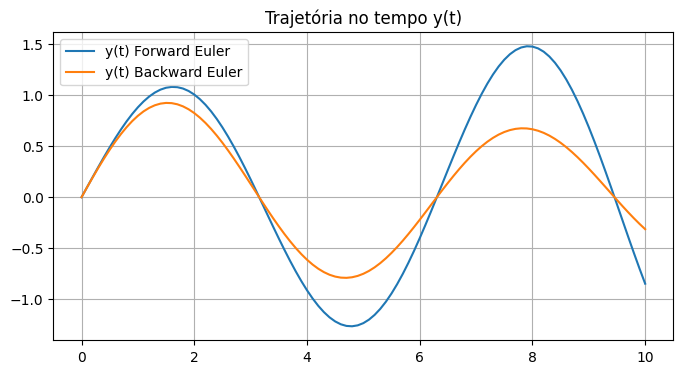

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(tf, uf[:,1], label='y(t) Forward Euler')
plt.plot(tb, ub[:,1], label='y(t) Backward Euler')
plt.title('Trajetória no tempo y(t)')
plt.legend()
plt.grid(True)
plt.show()

Questão 2

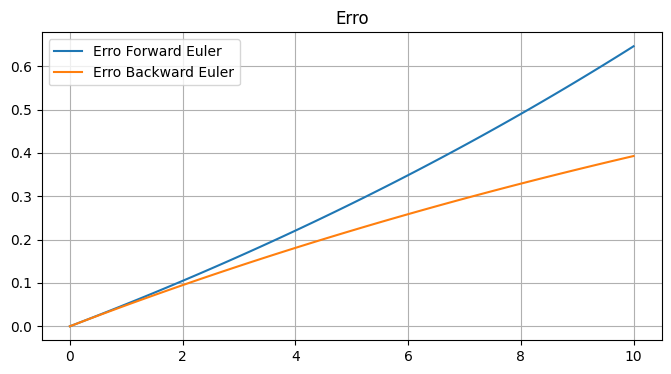

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(tf, err_fe, label='Erro Forward Euler')
plt.plot(tb, err_be, label='Erro Backward Euler')
plt.title('Erro')
plt.legend()
plt.grid(True)
plt.show()

Questão 3

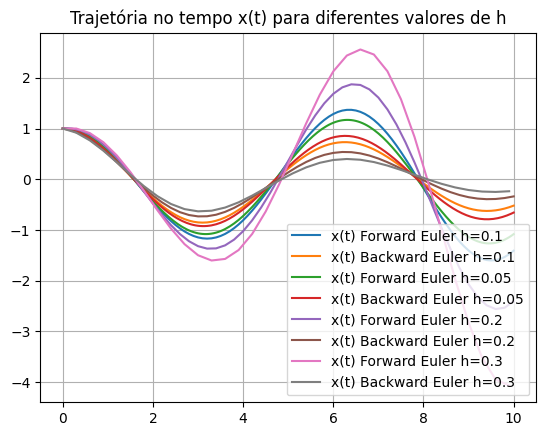

In [ ]:
h_values = [0.1,0.05,0.2,0.3]
for h in h_values:
    tf3, uf3 = forward_euler(10, h, f, 0, [1, 0])
    tb3, ub3 = backward_euler(10, h, A, 0, [1, 0])
    plt.plot(tf3, uf3[:,0], label=f'x(t) Forward Euler h={h}')
    plt.plot(tb3, ub3[:,0], label=f'x(t) Backward Euler h={h}')
plt.title('Trajetória no tempo x(t) para diferentes valores de h')
plt.legend()
plt.grid(True)
plt.show()

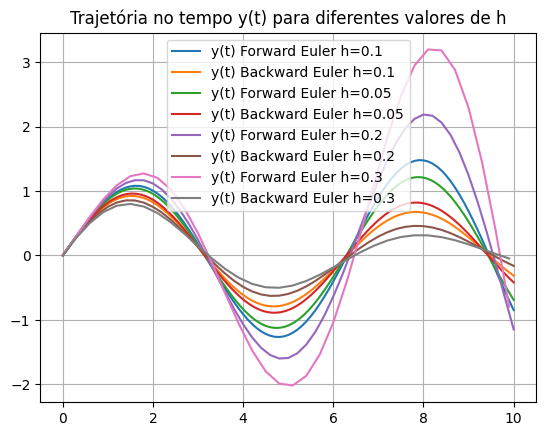

In [ ]:
for h in h_values:
    tf4, uf4 = forward_euler(10, h, f, 0, [1, 0])
    tb4, ub4 = backward_euler(10, h, A, 0, [1, 0])
    plt.plot(tf4, uf4[:,1], label=f'y(t) Forward Euler h={h}')
    plt.plot(tb4, ub4[:,1], label=f'y(t) Backward Euler h={h}')
plt.title('Trajetória no tempo y(t) para diferentes valores de h')
plt.legend()
plt.grid(True)
plt.show()

Questão 4

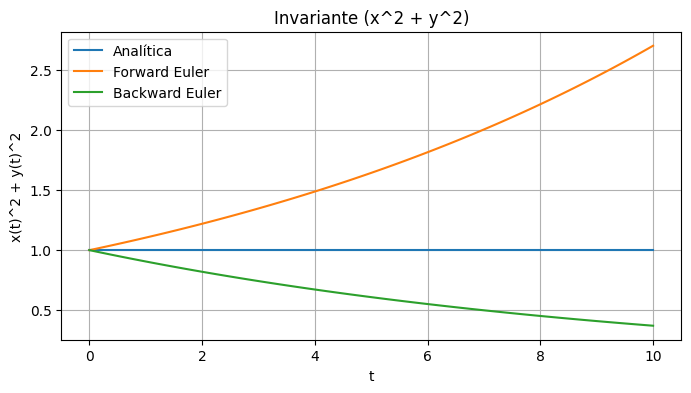

In [ ]:
r_analytic = u_an[:, 0]**2 + u_an[:, 1]**2
r_fe = uf[:, 0]**2 + uf[:, 1]**2
r_be = ub[:, 0]**2 + ub[:, 1]**2

plt.figure(figsize=(8, 4))
plt.plot(tf, r_analytic, label='Analítica')
plt.plot(tf, r_fe, label='Forward Euler')
plt.plot(tb, r_be, label='Backward Euler')
plt.xlabel('t')
plt.ylabel('x(t)^2 + y(t)^2')
plt.title('Invariante (x^2 + y^2)')
plt.legend()
plt.grid(True)
plt.show()